In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [2]:
titanic = pd.read_csv('https://peter.butka.website.tuke.sk/test/titanic2.csv')

In [3]:
titanic.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,family,has_family,fare_ordinal,title,title_short,age_ordinal,deck
0,1,1,female,29.00,0,0,24160,211.3375,B5,Southampton,0,False,most expensive,Miss,Miss,adult,B
1,1,1,male,0.92,1,2,113781,151.5500,C22 C26,Southampton,3,True,most expensive,Master,rare title,child,C
2,1,0,female,2.00,1,2,113781,151.5500,C22 C26,Southampton,3,True,most expensive,Miss,Miss,child,C
3,1,0,male,30.00,1,2,113781,151.5500,C22 C26,Southampton,3,True,most expensive,Mr,Mr,adult,C
4,1,0,female,25.00,1,2,113781,151.5500,C22 C26,Southampton,3,True,most expensive,Mrs,Mrs,adult,C


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pclass        1309 non-null   int64  
 1   survived      1309 non-null   int64  
 2   sex           1309 non-null   object 
 3   age           1309 non-null   float64
 4   sibsp         1309 non-null   int64  
 5   parch         1309 non-null   int64  
 6   ticket        1309 non-null   object 
 7   fare          1309 non-null   float64
 8   cabin         295 non-null    object 
 9   embarked      1309 non-null   object 
 10  family        1309 non-null   int64  
 11  has_family    1309 non-null   bool   
 12  fare_ordinal  1309 non-null   object 
 13  title         1309 non-null   object 
 14  title_short   1309 non-null   object 
 15  age_ordinal   1309 non-null   object 
 16  deck          295 non-null    object 
dtypes: bool(1), float64(2), int64(5), object(9)
memory usage: 165.0+ KB


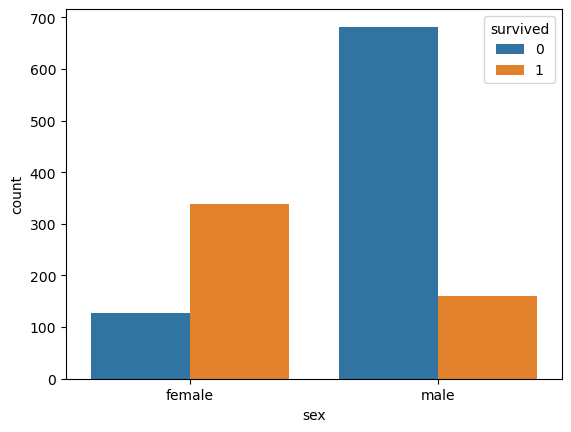

In [23]:
# Zostrojte graf znázorňujúci počet mužov a žien, ktorí prežili alebo zomreli
sns.countplot(data=titanic, x='sex', hue='survived')
plt.show()

In [5]:
titanic1 = titanic.copy()

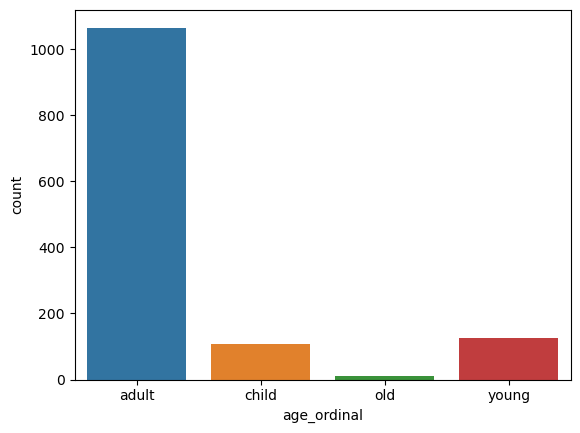

In [24]:
sns.countplot(data=titanic1, x='age_ordinal')
plt.show()

In [56]:
le = LabelEncoder()

X = titanic1[['age_ordinal', 'pclass', 'fare_ordinal', 'sex']].apply(le.fit_transform)
for column in X.columns:
    X[column] = le.fit_transform(X[column])

y = titanic1['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [57]:
model = CategoricalNB()

In [58]:
model.fit(X_train, y_train)

CategoricalNB()

In [59]:
y_pred = model.predict(X_test)

In [60]:
target_class = ['1', '0']
print(classification_report(y_test, y_pred, target_names=target_class))

              precision    recall  f1-score   support

           1       0.70      0.96      0.81        73
           0       0.90      0.48      0.63        58

    accuracy                           0.75       131
   macro avg       0.80      0.72      0.72       131
weighted avg       0.79      0.75      0.73       131



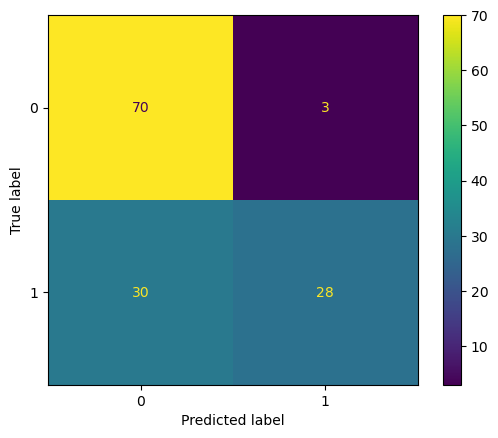

In [61]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

In [62]:
titanic2 = titanic.copy()

<AxesSubplot:xlabel='survived', ylabel='count'>

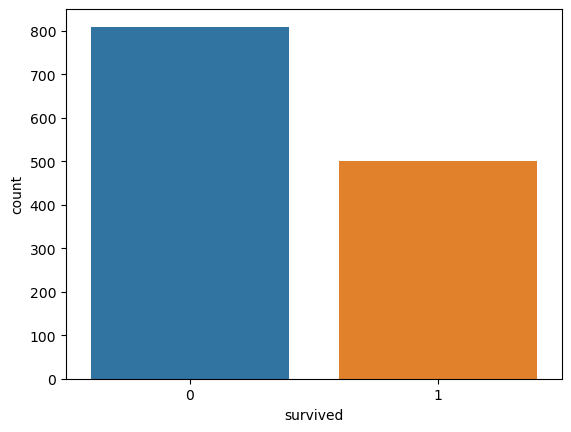

In [63]:
sns.countplot(titanic2, x='survived')

In [90]:
scaler_minmax = MinMaxScaler(feature_range=(0, 1)) 

titanic2['fare'] = scaler_minmax.fit_transform(titanic2[['fare']])

scaler_minmax = MinMaxScaler(feature_range=(0, 3)) 

titanic2['family'] = scaler_minmax.fit_transform(titanic2[['family']])

scaler_minmax = MinMaxScaler(feature_range=(0, 10)) 

titanic2['age'] = scaler_minmax.fit_transform(titanic2[['age']])

In [91]:
X = titanic2[['fare', 'family', 'age']]
y = titanic2['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [92]:
metrics = []
k = [1, 3, 5, 9]
for k in [1, 3, 5, 9]:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)    
    y_pred = neigh.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    metrics.append((k, f1))
    print(f"k: {k}, f1: {f1}")

k: 1, f1: 0.5471698113207546
k: 3, f1: 0.45878136200716846
k: 5, f1: 0.4104477611940298
k: 9, f1: 0.4048582995951417


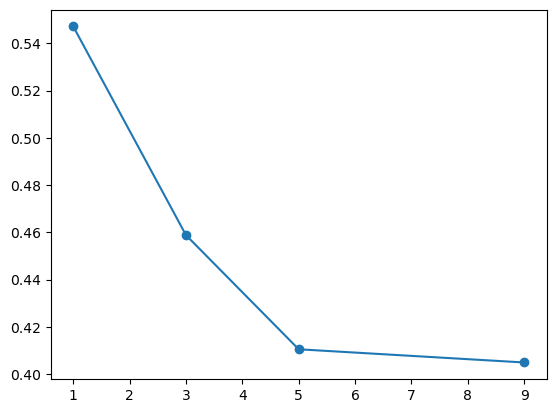

In [93]:
ks, f1_scores = zip(*metrics)
plt.plot(ks, f1_scores, marker='o', linestyle='-')
plt.show()